In [16]:
# Instalación de librerías necesarias para scraping y procesamiento de texto
!pip install spacy requests beautifulsoup4 wordcloud matplotlib -q

# Descarga del modelo grande de español de spaCy
!python -m spacy download es_core_news_lg -q

# Importación de librerías
import requests                      # Para hacer solicitudes HTTP
from bs4 import BeautifulSoup       # Para parsear y extraer contenido de HTML
import spacy                        # Librería de procesamiento de lenguaje natural
from spacy import displacy          # Para visualización del análisis gramatical
from collections import Counter     # Para contar frecuencias de palabras
from wordcloud import WordCloud     # Para generar nube de palabras
import matplotlib.pyplot as plt     # Para graficar


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 3.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
# -------- Scraping de Wikipedia --------

# URL del artículo de Wikipedia sobre Pizza
url = "https://es.wikipedia.org/wiki/Pizza"

# Solicita el contenido de la página
response = requests.get(url)
html = response.text

# Parseo del contenido HTML
soup = BeautifulSoup(html, "html.parser")

# Extracción de todos los párrafos del artículo (evita menús y tablas)
parrafos = soup.find_all("p")

# Unión de los textos de los párrafos
texto = " ".join([p.get_text() for p in parrafos])

# Muestra un fragmento del texto original (500 caracteres)
print(texto[:500])

La pizza es un plato hecho con una masa plana, habitualmente circular, elaborada con harina de trigo, levadura, agua y sal (a veces aceite de oliva) que tradicionalmente se cubre con salsa de tomate y mozzarella y se hornea a temperatura alta en un horno de leña.[1]​[2]​[3]​ Se venden en pizzerías y las elaboran pizzeros (pizzaiolo en italiano). Aunque se considera que su origen está en la gastronomía italiana,[2]​ específicamente la napolitana,[1]​ su consumo se extiende a casi todos los países


In [7]:
# -------- Limpieza del texto extraído --------

import re

# Elimina referencias [1], [2], etc.
texto_limpio = re.sub(r'\[\d+\]', '', texto)

# Reemplaza saltos de línea por espacios
texto_limpio = texto_limpio.replace('\n',' ').strip()

# Muestra un fragmento del texto limpio
print(texto_limpio[:500])

La pizza es un plato hecho con una masa plana, habitualmente circular, elaborada con harina de trigo, levadura, agua y sal (a veces aceite de oliva) que tradicionalmente se cubre con salsa de tomate y mozzarella y se hornea a temperatura alta en un horno de leña.​​​ Se venden en pizzerías y las elaboran pizzeros (pizzaiolo en italiano). Aunque se considera que su origen está en la gastronomía italiana,​ específicamente la napolitana,​ su consumo se extiende a casi todos los países del mundo, don


In [4]:
# -------- Procesamiento con spaCy --------

# Carga del modelo de lenguaje en español
import es_core_news_lg
nlp = es_core_news_lg.load()

# Procesamiento del texto limpio
doc = nlp(texto_limpio)
print("Texto procesado con spaCy")

Texto procesado con spaCy


In [8]:
# -------- Etiquetado gramatical --------

print("\n Etiquetado gramatical (primeras 30 palabras):")
for token in list(doc)[:30]:
    if not token.is_space:
        print(f"'{token.text}' -> {token.pos_} ({spacy.explain(token.pos_)})")


 Etiquetado gramatical (primeras 30 palabras):
'La' -> DET (determiner)
'pizza' -> NOUN (noun)
'es' -> AUX (auxiliary)
'un' -> DET (determiner)
'plato' -> NOUN (noun)
'hecho' -> ADJ (adjective)
'con' -> ADP (adposition)
'una' -> DET (determiner)
'masa' -> NOUN (noun)
'plana' -> ADJ (adjective)
',' -> PUNCT (punctuation)
'habitualmente' -> ADV (adverb)
'circular' -> VERB (verb)
',' -> PUNCT (punctuation)
'elaborada' -> ADJ (adjective)
'con' -> ADP (adposition)
'harina' -> NOUN (noun)
'de' -> ADP (adposition)
'trigo' -> NOUN (noun)
',' -> PUNCT (punctuation)
'levadura' -> NOUN (noun)
',' -> PUNCT (punctuation)
'agua' -> NOUN (noun)
'y' -> CCONJ (coordinating conjunction)
'sal' -> NOUN (noun)
'(' -> PUNCT (punctuation)
'a' -> ADP (adposition)
'veces' -> NOUN (noun)
'aceite' -> NOUN (noun)
'de' -> ADP (adposition)


In [9]:
# -------- Detección de entidades nombradas --------

if doc.ents:
    print("\n Entidades encontradas:")
    for ent in doc.ents:
        print(f"'{ent.text}' -> {ent.label_} ({spacy.explain(ent.label_)})")
else:
    print("\nNo se encontraron entidades nombradas.")

# Visualización de entidades nombradas
displacy.render(doc, style='ent', jupyter=True, options={'distance': 200})



 Entidades encontradas:
'Junto con la hamburguesa' -> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
'mundo,​​' -> PER (Named person or family.)
'América' -> LOC (Non-GPE locations, mountain ranges, bodies of water)
'Nueva York,​ Buenos Aires' -> LOC (Non-GPE locations, mountain ranges, bodies of water)
'Chicago.​​  Las técnicas e ingredientes' -> ORG (Companies, agencies, institutions, etc.)
'Entre los ingredientes habituales' -> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
'Italia' -> LOC (Non-GPE locations, mountain ranges, bodies of water)
'Campeonato Mundial de la Pizza' -> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
'Unión Europea' -> ORG (Companies, agencies, institutions, etc.)
'Especialidad' -> LOC (Non-GPE locations, mountain ranges, bodies of water)
'ETG)​' -> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
'Unesco' -> ORG (

In [10]:
# -------- Extracción de palabras clave --------

palabras_clave = []
for token in doc:
    if token.is_alpha and not token.is_stop:
        palabras_clave.append(token.lemma_.lower())  # Se usa el lema para generalizar

print(f"Se extrajeron {len(palabras_clave)} palabras clave.")
print("Ejemplo:", palabras_clave[:15])


Se extrajeron 1057 palabras clave.
Ejemplo: ['pizza', 'plato', 'masa', 'plano', 'habitualmente', 'circular', 'elaborado', 'harina', 'trigo', 'levadura', 'agua', 'sal', 'aceite', 'oliva', 'tradicionalmente']


In [11]:
# -------- Análisis de frecuencias y nube de palabras --------

# Conteo de frecuencia de palabras
frecuencia_palabras = Counter(palabras_clave)

# Top 15 palabras más frecuentes
palabras_mas_comunes = frecuencia_palabras.most_common(15)
print("\nTop 15 palabras más frecuentes:")
for palabra, frecuencia in palabras_mas_comunes:
    print(f"- '{palabra}': {frecuencia}")


Top 15 palabras más frecuentes:
- 'pizza': 66
- 'tomate': 20
- 'masa': 16
- 'ingrediente': 14
- 'queso': 12
- 'italiano': 11
- 'salsa': 10
- 'variante': 10
- 'siglo': 9
- 'estilo': 9
- 'encontrar': 7
- 'pan': 7
- 'harina': 6
- 'mozzarella': 6
- 'vender': 6


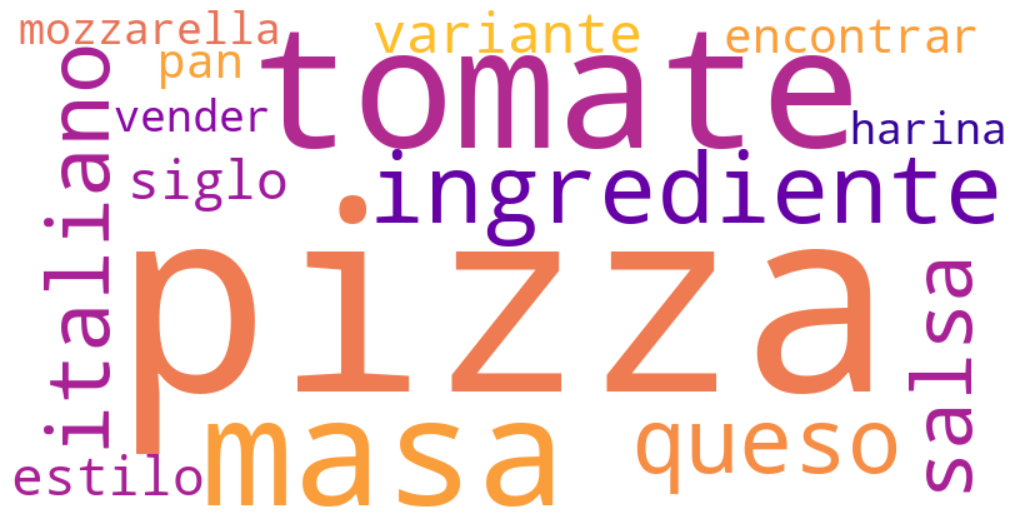

In [13]:
# Generación de la nube de palabras
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='plasma',
    max_words=15,
    stopwords=None,
    collocations=False
).generate_from_frequencies(frecuencia_palabras)

# Visualización de la nube
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [15]:
#-------- Visualización de relaciones gramaticales --------

displacy.render(list(doc.sents)[:2], style='dep', jupyter=True, options={'distance': 120})

https://es.wikipedia.org/wiki/Pizza



In [ ]:
# Instalamos las librerías necesarias
!pip install spacy requests beautifulsoup4 wordcloud matplotlib -q

# Descargamos el modelo de español grande de spaCy
!python -m spacy download es_core_news_lg -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 1.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Importación de librerías
import requests                      # Para hacer la solicitud HTTP a Wikipedia
from bs4 import BeautifulSoup       # Para parsear el HTML
import spacy                        # Procesamiento de lenguaje natural
from spacy import displacy          # Visualización de análisis de dependencias
from collections import Counter     # Contar la frecuencia de palabras
from wordcloud import WordCloud     # Generar nube de palabras
import matplotlib.pyplot as plt     # Visualización de la nube

# **Scraping de Wikipedia**

In [ ]:
# URL del artículo
url = "https://es.wikipedia.org/wiki/Pizza"

# Hacemos la solicitud a la página
response = requests.get(url)
html = response.text

# Parseamos el HTML con BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

# Extraemos todos los párrafos del artículo principal (excluye tablas y menús)
parrafos = soup.find_all("p")

# Unimos el texto plano de todos los párrafos
texto = " ".join([p.get_text() for p in parrafos])

# Mostramos un fragmento del texto extraído
print(texto[:500])  # Solo para ver cómo se ve

La pizza es un plato hecho con una masa plana, habitualmente circular, elaborada con harina de trigo, levadura, agua y sal (a veces aceite de oliva) que tradicionalmente se cubre con salsa de tomate y mozzarella y se hornea a temperatura alta en un horno de leña.[1]​[2]​[3]​ Se venden en pizzerías y las elaboran pizzeros (pizzaiolo en italiano). Aunque se considera que su origen está en la gastronomía italiana,[2]​ específicamente la napolitana,[1]​ su consumo se extiende a casi todos los países


# **Limpieza de texto**

In [ ]:
import re

# Eliminamos referencias [1], [2], etc. típicas de Wikipedia
texto_limpio = re.sub(r'\[\d+\]', '', texto)

# También podemos quitar saltos de línea innecesarios
texto_limpio = texto_limpio.replace('\n', ' ').strip()

# Mostramos una parte del texto limpio
print(texto_limpio[:500])

La pizza es un plato hecho con una masa plana, habitualmente circular, elaborada con harina de trigo, levadura, agua y sal (a veces aceite de oliva) que tradicionalmente se cubre con salsa de tomate y mozzarella y se hornea a temperatura alta en un horno de leña.​​​ Se venden en pizzerías y las elaboran pizzeros (pizzaiolo en italiano). Aunque se considera que su origen está en la gastronomía italiana,​ específicamente la napolitana,​ su consumo se extiende a casi todos los países del mundo, don


# **Procesamiento con spaCy**

In [ ]:
# Cargamos el modelo de español de spaCy
import es_core_news_lg
nlp = es_core_news_lg.load()

# Procesamos el texto limpio
doc = nlp(texto_limpio)

print("Texto procesado con spaCy")

Texto procesado con spaCy


# **Etiquetado gramatical**

In [ ]:
print("\n Etiquetado gramatical (primeras 30 palabras):")
for token in list(doc)[:30]:  # Solo primeras 30 para no alargar
    if not token.is_space:
        print(f"'{token.text}' -> {token.pos_} ({spacy.explain(token.pos_)})")


 Etiquetado gramatical (primeras 30 palabras):
'La' -> DET (determiner)
'pizza' -> NOUN (noun)
'es' -> AUX (auxiliary)
'un' -> DET (determiner)
'plato' -> NOUN (noun)
'hecho' -> ADJ (adjective)
'con' -> ADP (adposition)
'una' -> DET (determiner)
'masa' -> NOUN (noun)
'plana' -> ADJ (adjective)
',' -> PUNCT (punctuation)
'habitualmente' -> ADV (adverb)
'circular' -> VERB (verb)
',' -> PUNCT (punctuation)
'elaborada' -> ADJ (adjective)
'con' -> ADP (adposition)
'harina' -> NOUN (noun)
'de' -> ADP (adposition)
'trigo' -> NOUN (noun)
',' -> PUNCT (punctuation)
'levadura' -> NOUN (noun)
',' -> PUNCT (punctuation)
'agua' -> NOUN (noun)
'y' -> CCONJ (coordinating conjunction)
'sal' -> NOUN (noun)
'(' -> PUNCT (punctuation)
'a' -> ADP (adposition)
'veces' -> NOUN (noun)
'aceite' -> NOUN (noun)
'de' -> ADP (adposition)


# **Detección de entidades nombradas**

In [ ]:
if doc.ents:
    print("\n Entidades encontradas:")
    for ent in doc.ents:
        print(f"'{ent.text}' -> {ent.label_} ({spacy.explain(ent.label_)})")
else:
    print("\nNo se encontraron entidades nombradas.")


 Entidades encontradas:
'Junto con la hamburguesa' -> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
'mundo,​​' -> PER (Named person or family.)
'América' -> LOC (Non-GPE locations, mountain ranges, bodies of water)
'Nueva York,​ Buenos Aires' -> LOC (Non-GPE locations, mountain ranges, bodies of water)
'Chicago.​​  Las técnicas e ingredientes' -> ORG (Companies, agencies, institutions, etc.)
'Entre los ingredientes habituales' -> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
'Italia' -> LOC (Non-GPE locations, mountain ranges, bodies of water)
'Campeonato Mundial de la Pizza' -> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
'Unión Europea' -> ORG (Companies, agencies, institutions, etc.)
'Especialidad' -> LOC (Non-GPE locations, mountain ranges, bodies of water)
'ETG)​' -> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
'Unesco' -> ORG (

In [ ]:
displacy.render(doc, style='ent', jupyter=True, options={'distance': 200}) #Cada entidad aparecerá resaltada con un color distinto, y al lado dirá qué tipo de entidad es

# **Extracción de palabras clave**

In [ ]:
palabras_clave = []

for token in doc:
    # Solo palabras (sin puntuación, sin números, sin stopwords)
    if token.is_alpha and not token.is_stop:
        palabras_clave.append(token.lemma_.lower())  # Lema en minúscula

print(f"Se extrajeron {len(palabras_clave)} palabras clave.")
print("Ejemplo:", palabras_clave[:15])

Se extrajeron 1058 palabras clave.
Ejemplo: ['pizza', 'plato', 'masa', 'plano', 'habitualmente', 'circular', 'elaborado', 'harina', 'trigo', 'levadura', 'agua', 'sal', 'aceite', 'oliva', 'tradicionalmente']


# **Frecuencias y Nube de Palabras**

In [ ]:
# Contamos las palabras más comunes
frecuencia_palabras = Counter(palabras_clave)
palabras_mas_comunes = frecuencia_palabras.most_common(15)

print("\nTop 15 palabras más frecuentes:")
for palabra, frecuencia in palabras_mas_comunes:
    print(f"- '{palabra}': {frecuencia}")


Top 15 palabras más frecuentes:
- 'pizza': 66
- 'tomate': 20
- 'masa': 16
- 'ingrediente': 14
- 'queso': 12
- 'italiano': 11
- 'salsa': 10
- 'variante': 10
- 'siglo': 9
- 'estilo': 9
- 'encontrar': 7
- 'pan': 7
- 'harina': 6
- 'mozzarella': 6
- 'vender': 6


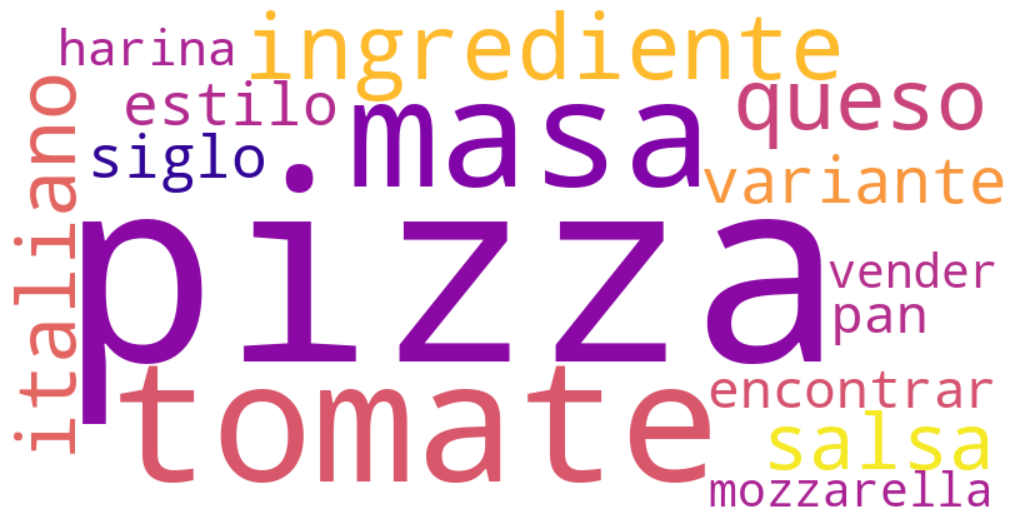

In [ ]:
# Generamos la nube de palabras
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='plasma',
    max_words=15,
    stopwords=None,
    collocations=False
).generate_from_frequencies(frecuencia_palabras)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Visualiza relaciones sintácticas entre palabras (solo primeras frases)
displacy.render(list(doc.sents)[:2], style='dep', jupyter=True, options={'distance': 120})

https://es.wikipedia.org/wiki/Pizza



In [ ]:
# Instalamos las librerías necesarias
!pip install spacy requests beautifulsoup4 wordcloud matplotlib -q

# Descargamos el modelo de español grande de spaCy
!python -m spacy download es_core_news_lg -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 1.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Importación de librerías
import requests                      # Para hacer la solicitud HTTP a Wikipedia
from bs4 import BeautifulSoup       # Para parsear el HTML
import spacy                        # Procesamiento de lenguaje natural
from spacy import displacy          # Visualización de análisis de dependencias
from collections import Counter     # Contar la frecuencia de palabras
from wordcloud import WordCloud     # Generar nube de palabras
import matplotlib.pyplot as plt     # Visualización de la nube

# **Scraping de Wikipedia**

In [ ]:
# URL del artículo
url = "https://es.wikipedia.org/wiki/Pizza"

# Hacemos la solicitud a la página
response = requests.get(url)
html = response.text

# Parseamos el HTML con BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

# Extraemos todos los párrafos del artículo principal (excluye tablas y menús)
parrafos = soup.find_all("p")

# Unimos el texto plano de todos los párrafos
texto = " ".join([p.get_text() for p in parrafos])

# Mostramos un fragmento del texto extraído
print(texto[:500])  # Solo para ver cómo se ve

La pizza es un plato hecho con una masa plana, habitualmente circular, elaborada con harina de trigo, levadura, agua y sal (a veces aceite de oliva) que tradicionalmente se cubre con salsa de tomate y mozzarella y se hornea a temperatura alta en un horno de leña.[1]​[2]​[3]​ Se venden en pizzerías y las elaboran pizzeros (pizzaiolo en italiano). Aunque se considera que su origen está en la gastronomía italiana,[2]​ específicamente la napolitana,[1]​ su consumo se extiende a casi todos los países


# **Limpieza de texto**

In [ ]:
import re

# Eliminamos referencias [1], [2], etc. típicas de Wikipedia
texto_limpio = re.sub(r'\[\d+\]', '', texto)

# También podemos quitar saltos de línea innecesarios
texto_limpio = texto_limpio.replace('\n', ' ').strip()

# Mostramos una parte del texto limpio
print(texto_limpio[:500])

La pizza es un plato hecho con una masa plana, habitualmente circular, elaborada con harina de trigo, levadura, agua y sal (a veces aceite de oliva) que tradicionalmente se cubre con salsa de tomate y mozzarella y se hornea a temperatura alta en un horno de leña.​​​ Se venden en pizzerías y las elaboran pizzeros (pizzaiolo en italiano). Aunque se considera que su origen está en la gastronomía italiana,​ específicamente la napolitana,​ su consumo se extiende a casi todos los países del mundo, don


# **Procesamiento con spaCy**

In [ ]:
# Cargamos el modelo de español de spaCy
import es_core_news_lg
nlp = es_core_news_lg.load()

# Procesamos el texto limpio
doc = nlp(texto_limpio)

print("Texto procesado con spaCy")

Texto procesado con spaCy


# **Etiquetado gramatical**

In [ ]:
print("\n Etiquetado gramatical (primeras 30 palabras):")
for token in list(doc)[:30]:  # Solo primeras 30 para no alargar
    if not token.is_space:
        print(f"'{token.text}' -> {token.pos_} ({spacy.explain(token.pos_)})")


 Etiquetado gramatical (primeras 30 palabras):
'La' -> DET (determiner)
'pizza' -> NOUN (noun)
'es' -> AUX (auxiliary)
'un' -> DET (determiner)
'plato' -> NOUN (noun)
'hecho' -> ADJ (adjective)
'con' -> ADP (adposition)
'una' -> DET (determiner)
'masa' -> NOUN (noun)
'plana' -> ADJ (adjective)
',' -> PUNCT (punctuation)
'habitualmente' -> ADV (adverb)
'circular' -> VERB (verb)
',' -> PUNCT (punctuation)
'elaborada' -> ADJ (adjective)
'con' -> ADP (adposition)
'harina' -> NOUN (noun)
'de' -> ADP (adposition)
'trigo' -> NOUN (noun)
',' -> PUNCT (punctuation)
'levadura' -> NOUN (noun)
',' -> PUNCT (punctuation)
'agua' -> NOUN (noun)
'y' -> CCONJ (coordinating conjunction)
'sal' -> NOUN (noun)
'(' -> PUNCT (punctuation)
'a' -> ADP (adposition)
'veces' -> NOUN (noun)
'aceite' -> NOUN (noun)
'de' -> ADP (adposition)


# **Detección de entidades nombradas**

In [ ]:
if doc.ents:
    print("\n Entidades encontradas:")
    for ent in doc.ents:
        print(f"'{ent.text}' -> {ent.label_} ({spacy.explain(ent.label_)})")
else:
    print("\nNo se encontraron entidades nombradas.")


 Entidades encontradas:
'Junto con la hamburguesa' -> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
'mundo,​​' -> PER (Named person or family.)
'América' -> LOC (Non-GPE locations, mountain ranges, bodies of water)
'Nueva York,​ Buenos Aires' -> LOC (Non-GPE locations, mountain ranges, bodies of water)
'Chicago.​​  Las técnicas e ingredientes' -> ORG (Companies, agencies, institutions, etc.)
'Entre los ingredientes habituales' -> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
'Italia' -> LOC (Non-GPE locations, mountain ranges, bodies of water)
'Campeonato Mundial de la Pizza' -> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
'Unión Europea' -> ORG (Companies, agencies, institutions, etc.)
'Especialidad' -> LOC (Non-GPE locations, mountain ranges, bodies of water)
'ETG)​' -> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
'Unesco' -> ORG (

In [ ]:
displacy.render(doc, style='ent', jupyter=True, options={'distance': 200}) #Cada entidad aparecerá resaltada con un color distinto, y al lado dirá qué tipo de entidad es

# **Extracción de palabras clave**

In [ ]:
palabras_clave = []

for token in doc:
    # Solo palabras (sin puntuación, sin números, sin stopwords)
    if token.is_alpha and not token.is_stop:
        palabras_clave.append(token.lemma_.lower())  # Lema en minúscula

print(f"Se extrajeron {len(palabras_clave)} palabras clave.")
print("Ejemplo:", palabras_clave[:15])

Se extrajeron 1058 palabras clave.
Ejemplo: ['pizza', 'plato', 'masa', 'plano', 'habitualmente', 'circular', 'elaborado', 'harina', 'trigo', 'levadura', 'agua', 'sal', 'aceite', 'oliva', 'tradicionalmente']


# **Frecuencias y Nube de Palabras**

In [ ]:
# Contamos las palabras más comunes
frecuencia_palabras = Counter(palabras_clave)
palabras_mas_comunes = frecuencia_palabras.most_common(15)

print("\nTop 15 palabras más frecuentes:")
for palabra, frecuencia in palabras_mas_comunes:
    print(f"- '{palabra}': {frecuencia}")


Top 15 palabras más frecuentes:
- 'pizza': 66
- 'tomate': 20
- 'masa': 16
- 'ingrediente': 14
- 'queso': 12
- 'italiano': 11
- 'salsa': 10
- 'variante': 10
- 'siglo': 9
- 'estilo': 9
- 'encontrar': 7
- 'pan': 7
- 'harina': 6
- 'mozzarella': 6
- 'vender': 6


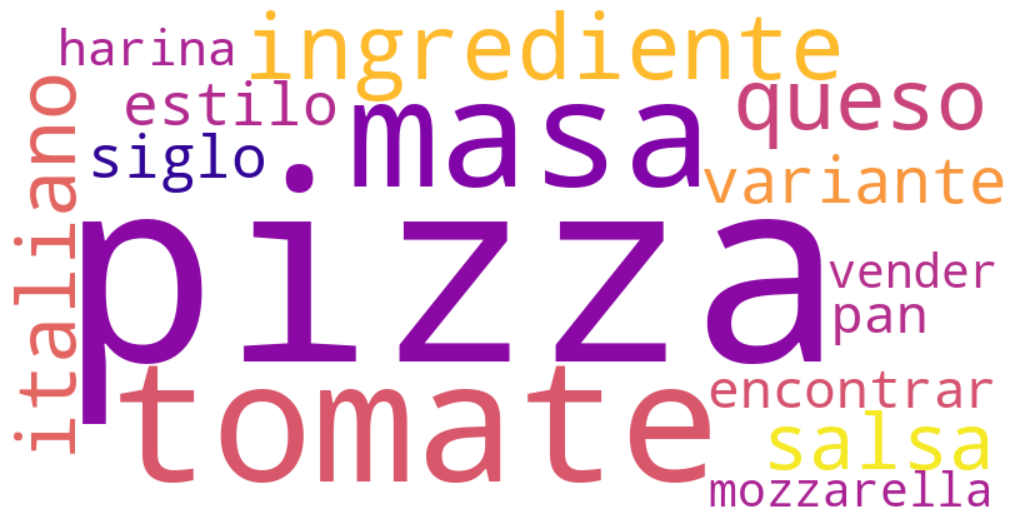

In [ ]:
# Generamos la nube de palabras
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='plasma',
    max_words=15,
    stopwords=None,
    collocations=False
).generate_from_frequencies(frecuencia_palabras)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Visualiza relaciones sintácticas entre palabras (solo primeras frases)
displacy.render(list(doc.sents)[:2], style='dep', jupyter=True, options={'distance': 120})